In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [2]:
FILE_NAME = '../project/mix_abalone_train.csv'

In [3]:
abalone_train = pd.read_csv(FILE_NAME)
abalone_train.shape

(94792, 9)

In [4]:
with open('unique.csv', mode = 'w') as f:

    for i in range(len(abalone_train.columns)):
        f.write(f'{abalone_train.columns[i]}, {abalone_train.iloc[:,i].unique()} \n')

In [5]:
abalone_train.corr(numeric_only=True)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.989600,0.911599,0.931092,0.908951,0.912522,0.910372,0.620809
Diameter,0.989600,1.000000,0.915261,0.933384,0.907634,0.913825,0.917211,0.634092
Height,0.911599,0.915261,1.000000,0.898076,0.857288,0.881601,0.899585,0.660468
Whole_weight,0.931092,0.933384,0.898076,1.000000,0.971160,0.973909,0.963767,0.613666
Shucked_weight,0.908951,0.907634,0.857288,0.971160,1.000000,0.948351,0.910346,0.510597
Viscera_weight,0.912522,0.913825,0.881601,0.973909,0.948351,1.000000,0.935596,0.584903
Shell_weight,0.910372,0.917211,0.899585,0.963767,0.910346,0.935596,1.000000,0.691610
Rings,0.620809,0.634092,0.660468,0.613666,0.510597,0.584903,0.691610,1.000000


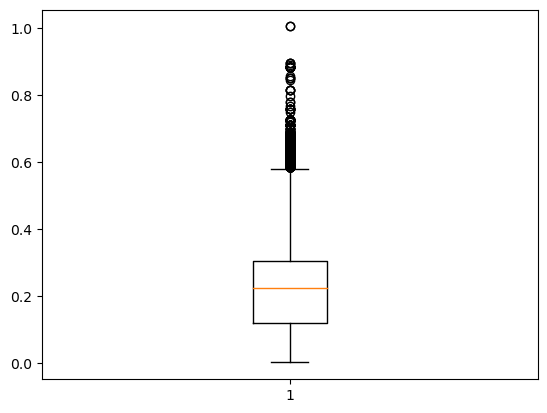

In [6]:
plt.boxplot(abalone_train['Shell_weight'])
plt.show()

In [7]:
abalone_train['Shell_weight'].describe()

count    94792.000000
mean         0.226468
std          0.130639
min          0.001500
25%          0.120000
50%          0.225000
75%          0.305000
max          1.005000
Name: Shell_weight, dtype: float64

In [8]:
abalone_train = abalone_train[abalone_train['Height'] != 0.].copy()
abalone_train.reset_index(inplace=True, drop=True)
abalone_train.shape

(94784, 9)

In [9]:
abalone_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94784 entries, 0 to 94783
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             94784 non-null  object 
 1   Length          94784 non-null  float64
 2   Diameter        94784 non-null  float64
 3   Height          94784 non-null  float64
 4   Whole_weight    94784 non-null  float64
 5   Shucked_weight  94784 non-null  float64
 6   Viscera_weight  94784 non-null  float64
 7   Shell_weight    94784 non-null  float64
 8   Rings           94784 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.5+ MB


In [10]:
abalone_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [11]:
abalone_train = pd.get_dummies(abalone_train)

In [12]:
abalone_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [13]:
abalone_train.replace(True, 1, inplace = True)
abalone_train.replace(False, 0, inplace = True)

In [14]:
abalone_train['Rings'] = abalone_train['Rings'] + 1.5

In [15]:
abalone_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,12.5,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,12.5,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,7.5,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,11.5,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,10.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5,1,0,0
94780,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5,0,0,1
94781,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5,0,0,1
94782,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5,1,0,0


In [16]:
abalone_train[:3] = np.square(abalone_train[:3])
abalone_train[3:7] = np.log(abalone_train[3:7] + 1)

In [17]:
abalone_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600,156.250000,1.0,0.000000,0.000000
1,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400,156.250000,1.0,0.000000,0.000000
2,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025,56.250000,0.0,1.000000,0.000000
3,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144,2.525729,0.0,0.000000,0.693147
4,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236,2.442347,0.0,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
94779,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000,12.500000,1.0,0.000000,0.000000
94780,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500,11.500000,0.0,0.000000,1.000000
94781,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000,10.500000,0.0,0.000000,1.000000
94782,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000,11.500000,1.0,0.000000,0.000000


In [18]:
feature_df = abalone_train[['Sex_F', 'Sex_I', 'Sex_M', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']].copy()
target_sr = abalone_train['Rings']

In [19]:
feature_df

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1.0,0.000000,0.000000,0.302500,0.184900,0.022500,0.595212,0.107912,0.021462,0.057600
1,1.0,0.000000,0.000000,0.396900,0.240100,0.021025,1.276900,0.209764,0.076452,0.102400
2,0.0,1.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
3,0.0,0.000000,0.693147,0.466874,0.388658,0.139762,0.649456,0.318817,0.186894,0.223144
4,0.0,0.693147,0.000000,0.441476,0.354172,0.122218,0.577736,0.314446,0.148420,0.180236
...,...,...,...,...,...,...,...,...,...,...
94779,1.0,0.000000,0.000000,0.565000,0.450000,0.165000,0.887000,0.370000,0.239000,0.249000
94780,0.0,0.000000,1.000000,0.590000,0.440000,0.135000,0.966000,0.439000,0.214500,0.260500
94781,0.0,0.000000,1.000000,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000
94782,1.0,0.000000,0.000000,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000


In [20]:
feature_df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000,94784.000000
mean,0.293316,0.363233,0.343438,0.517402,0.401952,0.135651,0.790815,0.341606,0.169918,0.226464
std,0.455282,0.480931,0.474854,0.118314,0.098093,0.038178,0.459229,0.205267,0.101333,0.130642
min,0.000000,0.000000,0.000000,0.025600,0.012100,0.000625,0.000441,0.000030,0.000009,0.000025
25%,0.000000,0.000000,0.000000,0.445000,0.345000,0.110000,0.419500,0.177500,0.086875,0.120000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000
75%,1.000000,1.000000,1.000000,0.600000,0.470000,0.160000,1.072500,0.464500,0.233000,0.305000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [21]:
target_sr.describe()

count    94784.000000
mean        11.210597
std          3.251593
min          2.442347
25%          9.500000
50%         10.500000
75%         12.500000
max        156.250000
Name: Rings, dtype: float64

## [2] test, train 분리

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature_df,target_sr, test_size=0.2, random_state=12)

In [23]:
print(f'x_train : {x_train.shape}, y_train : {y_train.shape}')
print(f'x_test : {x_test.shape} , y_test : {y_test.shape}')

x_train : (75827, 10), y_train : (75827,)
x_test : (18957, 10) , y_test : (18957,)


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [25]:
scaler.min_, scaler.data_min_

(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.24296934e-02,
        -1.89684904e-02, -5.53403431e-04, -1.56102934e-04, -2.03297144e-05,
        -1.18422455e-05, -2.48762407e-05]),
 array([0.000e+00, 0.000e+00, 0.000e+00, 2.560e-02, 1.210e-02, 6.250e-04,
        4.410e-04, 3.025e-05, 9.000e-06, 2.500e-05]))

In [24]:
scaler.scale_, scaler.data_max_ 

(array([1.        , 1.        , 1.        , 1.35135135, 1.68067227,
        0.88888889, 0.35417036, 0.67249496, 1.31665569, 0.99651221]),
 array([1.    , 1.    , 1.    , 0.815 , 0.65  , 1.13  , 2.8255, 1.488 ,
        0.76  , 1.005 ]))

In [43]:
x_train_scaled = scaler.transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_train_scaled.shape

(75827, 10)

In [44]:
x_train_scaled.min(), x_train_scaled.max()

(Sex_F             0.0
 Sex_I             0.0
 Sex_M             0.0
 Length            0.0
 Diameter          0.0
 Height            0.0
 Whole_weight      0.0
 Shucked_weight    0.0
 Viscera_weight    0.0
 Shell_weight      0.0
 dtype: float64,
 Sex_F             1.0
 Sex_I             1.0
 Sex_M             1.0
 Length            1.0
 Diameter          1.0
 Height            1.0
 Whole_weight      1.0
 Shucked_weight    1.0
 Viscera_weight    1.0
 Shell_weight      1.0
 dtype: float64)

In [45]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)
x_test_scaled.shape

(18957, 10)

In [46]:
x_test_scaled.min(), x_test_scaled.max()

(Sex_F             0.000000
 Sex_I             0.000000
 Sex_M             0.000000
 Length            0.074324
 Diameter          0.008403
 Height           -0.000889
 Whole_weight      0.001594
 Shucked_weight    0.000000
 Viscera_weight    0.000000
 Shell_weight      0.000299
 dtype: float64,
 Sex_F             1.000000
 Sex_I             1.000000
 Sex_M             1.000000
 Length            0.979730
 Diameter          0.966387
 Height            0.453333
 Whole_weight      1.000000
 Shucked_weight    0.841964
 Viscera_weight    1.000000
 Shell_weight      0.892377
 dtype: float64)

## [3_1] 앙상블 - Voting

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
k_model = KNeighborsRegressor()
l_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state= 12)

In [49]:
v_model = VotingRegressor(estimators=[('k_model', k_model), ('dt_model',dt_model) ,('l_model',l_model)]) 

In [50]:
# 학습 진행 
v_model.fit(x_train_scaled, y_train) 

In [51]:
# 성능 확인 
train_score = v_model.score(x_train_scaled,y_train )
test_score = v_model.score(x_test_scaled, y_test)

print(f'train_score : test_score = {train_score} : {test_score}')


## [3-1_1] 튜닝

In [52]:
from sklearn.ensemble import ExtraTreesRegressor

In [53]:
params = {'max_depth' : range(5,20), 
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson']}

In [54]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)

In [55]:
search_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

## [3_2] 앙상블 - Bagging

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
lf_model = RandomForestRegressor(random_state=12, oob_score= True)
lf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(oob_score=True, random_state=12)

In [58]:
print(f'feature_names_in_ : {lf_model.feature_names_in_}')
print(f'n_features_in_ : {lf_model.n_features_in_}개')
print(f'feature_importances_ : {lf_model.feature_importances_}')

feature_names_in_ : ['Sex_F' 'Sex_I' 'Sex_M' 'Length' 'Diameter' 'Height' 'Whole_weight'
 'Shucked_weight' 'Viscera_weight' 'Shell_weight']
n_features_in_ : 10개
feature_importances_ : [0.00508001 0.00768683 0.00473595 0.04239651 0.03773596 0.04026383
 0.07505808 0.14977077 0.06566268 0.57160938]


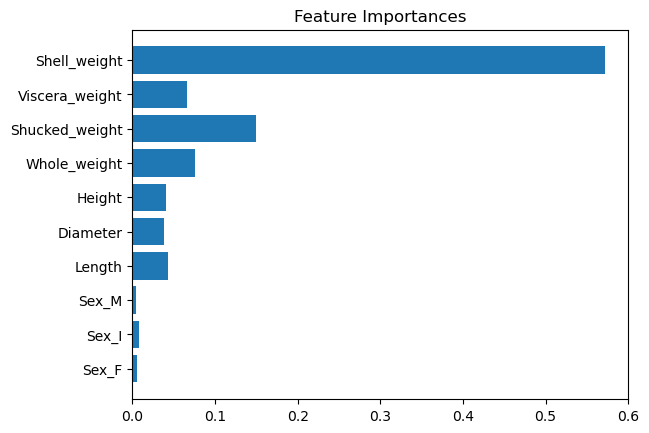

In [59]:
plt.barh(range(lf_model.n_features_in_), lf_model.feature_importances_ )
plt.yticks(range(lf_model.n_features_in_), lf_model.feature_names_in_)
plt.title('Feature Importances')
plt.show()

In [60]:
print(f'oob_score_ : {lf_model.oob_score_}')

oob_score_ : 0.6436497578214522


In [61]:
train_score = lf_model.score(x_train_scaled, y_train)
test_score = lf_model.score(x_test_scaled, y_test)

print(f'train_score : {train_score}, test_score : {test_score}')

train_score : 0.950524531106405, test_score : 0.6480456458352437


## [3-2_1] 튜닝

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor

In [63]:
params = {'max_depth' : range(5,20), 
          'min_samples_leaf' : range(2,5),
          'criterion' : ['squared_error','poisson']}

In [64]:
rf_model = ExtraTreesRegressor(random_state=12, oob_score=True, bootstrap=True)

In [65]:
search_cv = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [66]:
search_cv.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=poisson, max_depth=17, min_samples_leaf=3;, score=0.657 total time=   9.7s
[CV 2/5] END criterion=poisson, max_depth=17, min_samples_leaf=3;, score=0.657 total time=   8.8s
[CV 3/5] END criterion=poisson, max_depth=17, min_samples_leaf=3;, score=0.644 total time=   8.3s
[CV 4/5] END criterion=poisson, max_depth=17, min_samples_leaf=3;, score=0.656 total time=   8.1s
[CV 5/5] END criterion=poisson, max_depth=17, min_samples_leaf=3;, score=0.652 total time=   7.8s
[CV 1/5] END criterion=squared_error, max_depth=18, min_samples_leaf=3;, score=0.658 total time=   7.8s
[CV 2/5] END criterion=squared_error, max_depth=18, min_samples_leaf=3;, score=0.658 total time=   8.1s
[CV 3/5] END criterion=squared_error, max_depth=18, min_samples_leaf=3;, score=0.644 total time=   7.8s
[CV 4/5] END criterion=squared_error, max_depth=18, min_samples_leaf=3;, score=0.656 total time=   7.8s
[CV 5/5] END criterion=squared_e

In [ ]:
print(f'[search_cv.best_score_] {search_cv.best_score_}')
print(f'[search_cv.best_param] {search_cv.best_params_}')
print(f'[search_cv.best_estimator_] {search_cv.best_estimator_}')

cv_result_df = pd.DataFrame(search_cv.cv_results_)
cv_result_df

[search_cv.best_score_] 0.6542214747581608
[search_cv.best_param] {'min_samples_leaf': 3, 'max_depth': 19, 'criterion': 'squared_error'}
[search_cv.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=19, min_samples_leaf=3,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.252327,0.113930,0.225595,0.009183,3,16,squared_error,"{'min_samples_leaf': 3, 'max_depth': 16, 'crit...",0.656887,0.656259,0.643047,0.654924,0.651489,0.652521,0.005092,12
1,3.272304,0.073789,0.151353,0.009372,3,11,poisson,"{'min_samples_leaf': 3, 'max_depth': 11, 'crit...",0.641997,0.641072,0.627175,0.640415,0.637779,0.637687,0.005440,32
2,1.914210,0.028678,0.092195,0.009178,3,7,poisson,"{'min_samples_leaf': 3, 'max_depth': 7, 'crite...",0.590102,0.590206,0.571804,0.592749,0.590425,0.587057,0.007689,43
3,6.203281,0.085419,0.235323,0.010254,3,16,poisson,"{'min_samples_leaf': 3, 'max_depth': 16, 'crit...",0.656772,0.656094,0.642423,0.654538,0.652280,0.652421,0.005232,13
4,1.638911,0.016850,0.080448,0.007030,2,6,poisson,"{'min_samples_leaf': 2, 'max_depth': 6, 'crite...",0.565953,0.566721,0.549356,0.568435,0.568978,0.563889,0.007349,46
5,3.783368,0.068623,0.169367,0.012045,4,12,poisson,"{'min_samples_leaf': 4, 'max_depth': 12, 'crit...",0.646317,0.645863,0.631132,0.645730,0.641672,0.642143,0.005755,28
6,6.335556,0.084020,0.260143,0.008045,4,19,squared_error,"{'min_samples_leaf': 4, 'max_depth': 19, 'crit...",0.657343,0.657469,0.644062,0.655354,0.653317,0.653509,0.004961,6
7,1.446625,0.028690,0.066634,0.000129,2,5,poisson,"{'min_samples_leaf': 2, 'max_depth': 5, 'crite...",0.537621,0.537443,0.511020,0.536982,0.534415,0.531496,0.010303,50
8,6.014098,0.117138,0.262111,0.009473,4,18,squared_error,"{'min_samples_leaf': 4, 'max_depth': 18, 'crit...",0.657612,0.657055,0.643384,0.656066,0.651982,0.653220,0.005298,9
9,6.260571,0.076999,0.242400,0.011479,2,16,squared_error,"{'min_samples_leaf': 2, 'max_depth': 16, 'crit...",0.657295,0.656782,0.641963,0.655705,0.652813,0.652912,0.005690,10


In [ ]:
# params = {'max_depth' : range(2,10), 
#           'min_samples_leaf' : range(5,15),
#           'criterion' : ['squared_error','poisson']}

In [ ]:
# rf_model_u = ExtraTreesRegressor(random_state=12, oob_score=True)

In [ ]:
# search_cv_u = RandomizedSearchCV(rf_model_u, param_distributions=params, n_iter=50, verbose = 4, cv=5, refit= True)

In [ ]:
# search_cv_u.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=squared_error, max_depth=7, min_samples_leaf=13;, score=0.593 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=7, min_samples_leaf=13;, score=0.592 total time=   1.5s
[CV 3/5] END criterion=squared_error, max_depth=7, min_samples_leaf=13;, score=0.578 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=7, min_samples_leaf=13;, score=0.595 total time=   1.6s
[CV 5/5] END criterion=squared_error, max_depth=7, min_samples_leaf=13;, score=0.594 total time=   1.6s
[CV 1/5] END criterion=squared_error, max_depth=9, min_samples_leaf=14;, score=0.625 total time=   2.1s
[CV 2/5] END criterion=squared_error, max_depth=9, min_samples_leaf=14;, score=0.626 total time=   2.0s
[CV 3/5] END criterion=squared_error, max_depth=9, min_samples_leaf=14;, score=0.609 total time=   2.0s
[CV 4/5] END criterion=squared_error, max_depth=9, min_samples_leaf=14;, score=0.623 total time=   2.0s
[C

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesRegressor(bootstrap=True, oob_score=True,
                                                 random_state=12),
                   n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': range(2, 10),
                                        'min_samples_leaf': range(5, 15)},
                   verbose=4)

In [ ]:
# print(f'[search_cv_u.best_score_] {search_cv_u.best_score_}')
# print(f'[search_cv_u.best_param] {search_cv_u.best_params_}')
# print(f'[search_cv_u.best_estimator_] {search_cv_u.best_estimator_}')

# cv_result_df_u = pd.DataFrame(search_cv_u.cv_results_)
# cv_result_df_u

[search_cv_u.best_score_] 0.6214579347235933
[search_cv_u.best_param] {'min_samples_leaf': 6, 'max_depth': 9, 'criterion': 'squared_error'}
[search_cv_u.best_estimator_] ExtraTreesRegressor(bootstrap=True, max_depth=9, min_samples_leaf=6,
                    oob_score=True, random_state=12)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.612711,0.065929,0.088827,0.007462,13,7,squared_error,"{'min_samples_leaf': 13, 'max_depth': 7, 'crit...",0.592515,0.592238,0.578496,0.595132,0.594042,0.590485,0.006086,12
1,1.993745,0.035544,0.115480,0.001875,14,9,squared_error,"{'min_samples_leaf': 14, 'max_depth': 9, 'crit...",0.625095,0.625541,0.609210,0.623267,0.620393,0.620701,0.006024,5
2,1.176607,0.009502,0.053166,0.006047,11,4,poisson,"{'min_samples_leaf': 11, 'max_depth': 4, 'crit...",0.507629,0.508104,0.484745,0.504613,0.512755,0.503569,0.009766,36
3,2.055571,0.018309,0.114045,0.005855,7,9,squared_error,"{'min_samples_leaf': 7, 'max_depth': 9, 'crite...",0.625552,0.625571,0.609973,0.624099,0.621885,0.621416,0.005878,2
4,2.051892,0.014440,0.114667,0.003846,8,9,squared_error,"{'min_samples_leaf': 8, 'max_depth': 9, 'crite...",0.625280,0.624060,0.608108,0.623614,0.622345,0.620681,0.006356,6
5,1.861108,0.010315,0.088789,0.005920,11,7,poisson,"{'min_samples_leaf': 11, 'max_depth': 7, 'crit...",0.584868,0.589188,0.575257,0.591539,0.587541,0.585679,0.005646,21
6,1.228163,0.031225,0.065094,0.004538,9,5,squared_error,"{'min_samples_leaf': 9, 'max_depth': 5, 'crite...",0.537452,0.540907,0.517643,0.538706,0.534906,0.533923,0.008368,26
7,0.991246,0.013420,0.046905,0.003339,11,3,poisson,"{'min_samples_leaf': 11, 'max_depth': 3, 'crit...",0.476822,0.477942,0.454305,0.474818,0.481015,0.472980,0.009551,44
8,1.803940,0.029082,0.100282,0.005494,14,8,squared_error,"{'min_samples_leaf': 14, 'max_depth': 8, 'crit...",0.612087,0.610632,0.594137,0.612551,0.611715,0.608225,0.007072,8
9,1.405542,0.004833,0.068744,0.004304,5,5,poisson,"{'min_samples_leaf': 5, 'max_depth': 5, 'crite...",0.537599,0.535657,0.511862,0.537115,0.534919,0.531430,0.009832,30
